Columns in dataset: Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


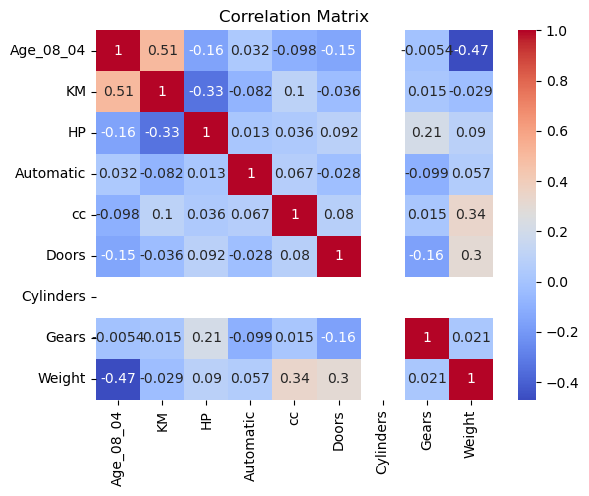

Variance Inflation Factor (VIF):
      Feature          VIF
0  Age_08_04     1.909676
1         KM     1.679142
2         HP     1.218066
3  Automatic     1.047677
4         cc     1.150898
5      Doors     1.155484
6  Cylinders  1378.328904
7      Gears     1.109188
8     Weight     1.664910
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1128.
Date:                Tue, 04 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:36:08   Log-Likelihood:                -12377.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                     

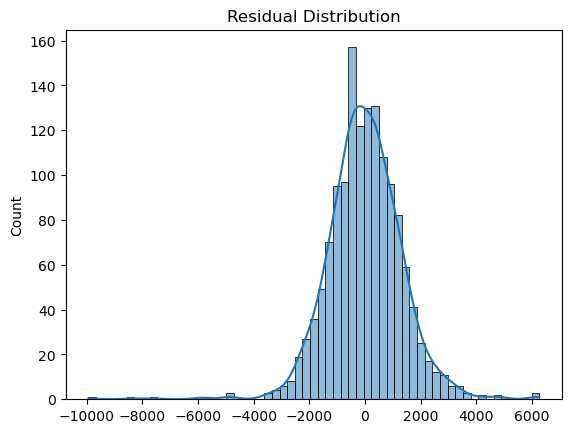

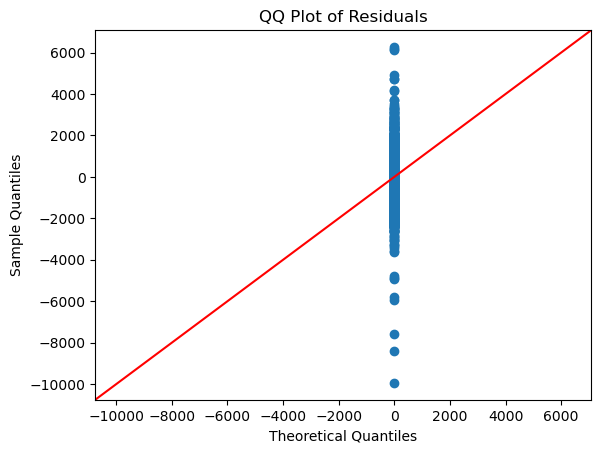

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = r"C:\Users\Owner\OneDrive\Desktop\SVM\Recomandation system\ToyotaCorolla - MLR.csv"
df = pd.read_csv(file_path)

# Display column names
print("Columns in dataset:", df.columns)

# Define target and feature columns
target_col = "Price"  # Predicting car price
feature_cols = ["Age_08_04", "KM", "HP", "Automatic", "cc", "Doors", "Cylinders", "Gears", "Weight"]  # Select numeric features

# Ensure selected columns exist
missing_cols = [col for col in feature_cols + [target_col] if col not in df.columns]
if missing_cols:
    raise KeyError(f"Columns not found in dataset: {missing_cols}")

# Drop any missing values
df = df.dropna()

# Check for multicollinearity
corr_matrix = df[feature_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Compute VIF (Variance Inflation Factor)
X = df[feature_cols]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):\n", vif_data)

# Fit Multiple Linear Regression (MLR)
model = sm.OLS(df[target_col], X).fit()

# Display model summary
print(model.summary())

# Assess Model Fit using AIC and BIC
print("\nAIC:", model.aic)
print("BIC:", model.bic)

# Robust Regression to handle outliers
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize for robust regression
huber = HuberRegressor()
huber.fit(X_scaled, df[target_col])
print("\nRobust Regression Coefficients:", huber.coef_)
print("Intercept:", huber.intercept_)

# Plot residuals
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

# QQ Plot for normality check
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals")
plt.show()
